Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAMES = "Oliver Gladfelter, DeVon Gardner"

"""
Purpose: This program reads two text files, one containing weather data and one containing flights data, and converts the 
the information into tidy dataframes suitable for analysis. It utilizes multiple functions which serve the following 
purposes: extract year, month, and day information from a combined column; rearrange the columns of a data frame; convert 
times into military time stamps; and one for each text file, designed to make necessary updates. 

This program also merges the two dataframes using a many-to-one relationship, and outputs all dataframes to saved csv files. 

Finally, the program uses the dataframes to create a series of graphs intended to answer research questions.
"""

'\nPurpose: This program reads two text files, one containing weather data and one containing flights data, and converts the \nthe information into tidy dataframes suitable for analysis. It utilizes multiple functions which serve the following \npurposes: extract year, month, and day information from a combined column; rearrange the columns of a data frame; convert \ntimes into military time stamps; and one for each text file, designed to make necessary updates. \n\nThis program also merges the two dataframes using a many-to-one relationship, and outputs all dataframes to saved csv files. \n\nFinally, the program uses the dataframes to create a series of graphs intended to answer research questions.\n'

---

In [2]:
import pandas as pd

The weather csv file contains three distinct time variables: year, month, and day. These data are a vital part of the data and columns we intend to see in the final, tidy data set. However, munging the data set into a tidy form requires pivoting the set on a time column. To facilitate pivoting, we plan on combining the year, month, and day columns into one singular date column, on which we will pivot later on. Because we will lose the original columns in the process and be left with one column containing three different pieces of information, it is necessary to create a series of functions which can split the date column back to three columns: year, month, day. In order to accomplish this, we have created three functions, each specifically designed to extract a part of the date column. This is done simply by splitting the content within the column - a singular string in which information is seperated by hyphens - into a list, then returning one element of the resulting list. 

In [3]:
def yearExtractor(yearMonth):
    """
    Seperates a string by its hyphen, then returns the first item in the resulting list
    Parameters: string of three data points seperated by a hyphen
    Returns: First element of the string, in int form
    """
    timeList = yearMonth.split('-')
    return int(timeList[0])
    
def monthExtractor(yearMonth):
    """
    Seperates a string by its hyphen, then returns integer conversion of the second item in the resulting list
    Parameters: string of three data points seperated by a hyphen
    Returns: Second element of the string, in int form
    """
    timeList = yearMonth.split('-')
    return int(timeList[1])
    
def dayExtractor(yearMonth):
    """
    Seperates a string by its hyphen, then returns integer conversion of the third item in the resulting list
    Parameters: string of three data points seperated by a hyphen
    Returns: Third element of the string, with the 'X' removed, and in int form
    """
    timeList = yearMonth.split('-')
    day = timeList[2].strip('X')
    return int(day)

When this process of extracting the year, month, and day data from the 'year-month-day' column used to pivot the dataframe is complete, the data will be added to the dataframe in three unique columns. These columns, however, will be located on the far right of the dataframe - at the end. While this was not entirely necessary, we preferred to arrange the dataframe so the year, month, and day columns are the first three columns. The following function accepts a dataframe and number of columns as parameters, and rearranges the columns of the dataframe so that the last few, depending on the parameter inputs, are moved to become the first few columns. For our purposes, we use this to move the last three columns - year, month, day - of the weather dataframe.  

In [4]:
def rearrangeColumns(dataframe, num):
    """
    Rearrange the columns so that the last 'num' columns are shifted to become the first columns
    Parameters: the dataframe to be arranged, the amount of columns at the end to be shifted to the front
    Return: the updated dataframe
    """
    #obtains a list of the columns
    cols = dataframe.columns.tolist()
    
    #splits the list and attaches the beginning part to the end part, rearranging the columns list 
    cols = cols[-num:] + cols[:-num]
    dataframe = dataframe[cols]
    
    return dataframe

To begin the process of munging the weather file into a tidy dataframe, we first utilize pandas to read the csv file and convert the result into a dtaframe. Immediately it is apparant that the 'X' column contains extraneous infrormation. This is simply resolved by deleting the column.


Next, the dataframe has two major problems which need addressing: first, the 'measure' column contains fields that are values; second, the 'X1' through 'X31' columns each represent a day, meaning there are time values running in two different directions. We resolve this by merging the year and month columns into one, accomplished by first converting the values into strings and then concating them using a hyphen to seperate the information within the string. We then melt the 31 'X1' through 'X31' columns into one column, appropriately collecting any data points that represent a day into one column, which we then name 'day.' Through this action, we have now ensured all time variables are running in the same direction. We then update the time column to include the days, so that this complete date column, titled 'year-month-day', may be used as a pivot column. Pivoting the dataframe is necessary as the 'measure' column contains several variables. We thus resolve this by pivoting the variable names within the 'measure' column into their own column headers.

We are now left with a dataframe containing several variables describing weather information such as wind speechs and temperatures, and a date column. Because we do not want multiple pieces of information stored in one column, it is necessary to envoke our yearExtractor, monthExtractor, and dayExtractor functions in order to recreate new columns in which each contains the information of only part of the date. Through this process we are able to divide the single date column into three columns: year, month, day. The column from which we extract from can then be deleted.

Finally, we sort the contents of the entire dataframe using these three time variables and rearrange the columns thus that these time variables are the first three of the set.


In [5]:
def weathercsvIntoTidyDataFrame(filename):
    """
    Converts an weather csv file into a tidy dataframe
    Parameters: csv file
    Returns: dataframe
    """
    
    #Read a weather csv file in, convert to a dataframe, and drop NaN values
    weather = pd.read_csv(filename)
    weatherDF = pd.DataFrame(weather)
    weatherDF = weatherDF.dropna(axis=1, how='all')
    
    #Delete the X column, which is extraneous
    del weatherDF['X']

    #Convert the year and month columns into strings so they can be merged into one column
    weatherDF['year'] = weatherDF['year'].apply(str)
    weatherDF['month'] = weatherDF['month'].apply(str)

    #Create a column containing a concat of the year and month columns, seperated by a hyphen
    weatherDF['year-month'] = weatherDF['year'] + '-' + weatherDF['month']

    #Delete the year and month columns
    weatherDF = weatherDF.drop(['year', 'month'], axis=1)
    
    #Melt the dataset, preserving the year-month and measure columns
    weatherDF = weatherDF.melt(id_vars = ['year-month', 'measure'], var_name = 'day', value_name = 'Value')
    
    #update the year-month column to add the day column, saving the result to a new 'year-month-day' column
    weatherDF['year-month-day'] = weatherDF['year-month'] + '-' + weatherDF['day']
    
    #delete the Xs (days) column and the year-month column 
    weatherDF = weatherDF.drop(['day', 'year-month'], axis=1)
    
    #Pivot the dataframe on the the 'measure' column, preserving the year-month column
    weatherDF = weatherDF.pivot(index = 'year-month-day', columns = 'measure', values = 'Value')
    
    #Because the pivot function converts 'year-month-day' into the index, we need to reset the index so we can mutate the time column
    weatherDF = weatherDF.reset_index()
    
    #Access the yearExtractor, monthExtractor, dayExtractor functions to seperate out the 'year-month-day' column into 3 seperate columns
    weatherDF['year'] = weatherDF['year-month-day'].apply(yearExtractor)
    weatherDF['month'] = weatherDF['year-month-day'].apply(monthExtractor)
    weatherDF['day'] = weatherDF['year-month-day'].apply(dayExtractor)
    
    #Delete the 'year-month-day' column 
    del weatherDF['year-month-day']
    
    #Sort the dataframe by year, then month, then day to put into chronological order 
    weatherDF = weatherDF.sort_values(['year', 'month', 'day'])
    
    #Reset the index and delete the former, which is now out of order
    weatherDF = weatherDF.reset_index()
    del weatherDF['index']
    
    #Rearrange the columns so that the year, month, and day columns are the first 3 columns
    weatherDF = rearrangeColumns(weatherDF, 3)
    
    return weatherDF
    

The flights data file contains several values of time, yet in varying formats. Many times are shown as "1340" where the first two digits are the hours and the last two digits are the minutes. Others are represented in military time and are expressed as "XX:XX:XX". It is thus a primary objective to convert all time columns into the preferred military time stamp format. Because some times we intend to convert are represented as integers and others as floats (1340.0, for example), we begin by converting time values into int values. This removes the decimial point from any points, ensuring all the time values we intend to convert to military time are either three or four digits.

From that point conversion is as simple as parsing out the relevant information from the string and concating into a single string resembling a military time stamp.

In [6]:
def convertTime(time):
    """
    Takes time in int or float format, and converts to military time stamp
    Parameters: int or float representing time expressed as "xxxx.0" or "xxxx"
    Returns: string representing time expressed as "xx:xx:xx"
    """
    
    #convert to int, which removes the decimal on floats and standarizes all input to 4 or 3 digits
    time = int(time)
    #convert to string
    time = str(time)
    
    #defines the time variables as token 0s in case incorrect data exist, preventing error from occuring at the return statement
    hours = "0"
    minutes = "0"
    
    #if statement to properly handle times of both 3 or 4 character length
    if len(time) == 4:
        hours = time[0:2]       #parse out hours from string
        minutes = time[2:4]     #parse out minutes from string
    if len(time) == 3:
        hours = time[0]
        minutes = time[1:3]
    
    
    return hours + ":" + minutes + ":00" 

After reading and converting the flights file into a dataframe, munging into a tidy data format is accomplished by converting all time values into a military time stamp, utilizing the convertTime function. There are also several columns containing data found in other columns, so we delete those extraneous columns. Finally, we sort the dataframe by the year, month, and day columns such that it is in chronological order.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import numpy as np

In [10]:
tidyWeather = weathercsvIntoTidyDataFrame('weather2.csv')
#tidyFlights = tidyFlights("flights.csv")

Does the distance of a flight play a factor in the flight's potential arrival delay? Longer flights are potentially more difficult to accurately predict and will have more opportunities to encounter adverse weather condition, therefore it is likely larger delays in arrival time correlate with longer flight distances.

We hypothesized that the longer flight distance, the greater the arrival delay: a direct
relationship. However, the data yeilds adverse results than our prediction. As the line of best
fit demonstrates, the arrival delay actually decreases as the distance increases implying that
there is an indirect relationship between Flight Distance and Arrival Delay.

Is there a relationship between the time of the year and the average temperature in a day? 

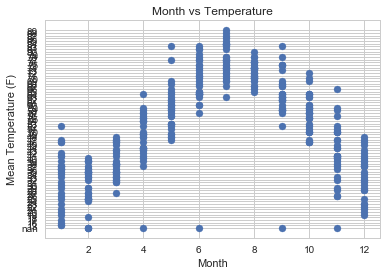

In [11]:
plot = plt.scatter(tidyWeather['month'], tidyWeather['Mean.TemperatureF'])
plt.xlabel('Month')
plt.ylabel('Mean Temperature (F)')
plt.title('Month vs Temperature')
plt.show()

Here, we wanted to analyze how month affects Temperature. Knowing that months are correlated
with specific seasons, we expected to see variation within temperature. The visual exhibits a sort
of parabolic shape where the maximum temperature occurs within month 7 and where the lower extremes 
occur at months 1,2,10 and 12. This is expected where as we experience colder temperatures within the early
and latter months and experience the greates temperatures within the middle of the year.

Is there a correlation between wind speeds and delays in flight arrivals?  

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
from IPython.core.display import Image

In [ ]:
![alt text](Sheet1.jpg "Image 1")


Is there a relationship between the time of the year and the average temperature in a day? 


![alt text](Sheet1.jpg "Image 1")

Here, we wanted to analyze how month affects Temperature. Knowing that months are correlated
with specific seasons, we expected to see variation within temperature. The visual exhibits a sort
of parabolic shape where the maximum temperature occurs within month 7 and where the lower extremes 
occur at months 1,2,10 and 12. This is expected where as we experience colder temperatures within the early
and latter months and experience the greates temperatures within the middle of the year.

Is there a correlation between the air carrier and the delay?